In [ ]:
!pip install tensorflow
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
scikit-learn

NameError: name 'scikit' is not defined

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import math
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
import keras_tuner as kt
from keras import layers
import keras.optimizers as optimizers
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import tensorflow

print(f"Scikit-learn version: {tensorflow.__version__}")



Scikit-learn version: 2.15.0


In [ ]:
df = p.read_csv('FedCycleData071012 (2) (1).csv')

In [ ]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [ ]:
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [ ]:
c = [ 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding',
       'Religion', 'ReligionM', 'Ethnicity', 'EthnicityM', 'Schoolyears',
       'SchoolyearsM', 'OccupationM', 'IncomeM', 'Height', 'Weight',
       'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions',
       'Medvits', 'Medvitexplain', 'Gynosurgeries', 'LivingkidsM', 'Boys',
       'Girls', 'MedvitsM', 'MedvitexplainM', 'Urosurgeries', 'Breastfeeding',
       'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
       'NextpregM', 'Spousesame', 'SpousesameM', 'Timeattemptpreg', 'BMI']

In [ ]:
for l in c:
  df[l] = p.to_numeric(df[l], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ClientID                    1665 non-null   object 
 1   CycleNumber                 1665 non-null   int64  
 2   Group                       1665 non-null   int64  
 3   CycleWithPeakorNot          1665 non-null   int64  
 4   ReproductiveCategory        1665 non-null   int64  
 5   LengthofCycle               1665 non-null   int64  
 6   MeanCycleLength             141 non-null    float64
 7   EstimatedDayofOvulation     1515 non-null   float64
 8   LengthofLutealPhase         1514 non-null   float64
 9   FirstDayofHigh              1407 non-null   float64
 10  TotalNumberofHighDays       1653 non-null   float64
 11  TotalHighPostPeak           1662 non-null   float64
 12  TotalNumberofPeakDays       1649 non-null   float64
 13  TotalDaysofFertility        1634 

In [ ]:
df.isnull().sum()

ClientID                   0
CycleNumber                0
Group                      0
CycleWithPeakorNot         0
ReproductiveCategory       0
                        ... 
NextpregM               1524
Spousesame              1523
SpousesameM             1523
Timeattemptpreg         1523
BMI                     1534
Length: 80, dtype: int64

In [ ]:
null_columns = []
def columns_with_high_null_values(df, threshold):
    null_sum = df.isnull().sum()
    columns_to_print = null_sum[null_sum > threshold].index.tolist()

    for column in columns_to_print:
        print(f"Column: {column}, Null Count: {null_sum[column]}")
    return columns_to_print

In [ ]:
null_columns = columns_with_high_null_values(df,833)

Column: MeanCycleLength, Null Count: 1524
Column: MeanMensesLength, Null Count: 1524
Column: MensesScoreDaySix, Null Count: 1062
Column: MensesScoreDaySeven, Null Count: 1441
Column: MensesScoreDayEight, Null Count: 1597
Column: MensesScoreDayNine, Null Count: 1639
Column: MensesScoreDayTen, Null Count: 1659
Column: MensesScoreDay11, Null Count: 1663
Column: MensesScoreDay12, Null Count: 1664
Column: MensesScoreDay13, Null Count: 1664
Column: MensesScoreDay14, Null Count: 1664
Column: MensesScoreDay15, Null Count: 1664
Column: MeanBleedingIntensity, Null Count: 1555
Column: PhasesBleeding, Null Count: 1559
Column: IntercourseDuringUnusBleed, Null Count: 1583
Column: Age, Null Count: 1523
Column: AgeM, Null Count: 1523
Column: Maristatus, Null Count: 1523
Column: MaristatusM, Null Count: 1523
Column: Yearsmarried, Null Count: 1534
Column: Wedding, Null Count: 1655
Column: Religion, Null Count: 1523
Column: ReligionM, Null Count: 1523
Column: Ethnicity, Null Count: 1524
Column: Ethnicity

In [ ]:
null_columns

['MeanCycleLength',
 'MeanMensesLength',
 'MensesScoreDaySix',
 'MensesScoreDaySeven',
 'MensesScoreDayEight',
 'MensesScoreDayNine',
 'MensesScoreDayTen',
 'MensesScoreDay11',
 'MensesScoreDay12',
 'MensesScoreDay13',
 'MensesScoreDay14',
 'MensesScoreDay15',
 'MeanBleedingIntensity',
 'PhasesBleeding',
 'IntercourseDuringUnusBleed',
 'Age',
 'AgeM',
 'Maristatus',
 'MaristatusM',
 'Yearsmarried',
 'Wedding',
 'Religion',
 'ReligionM',
 'Ethnicity',
 'EthnicityM',
 'Schoolyears',
 'SchoolyearsM',
 'OccupationM',
 'IncomeM',
 'Height',
 'Weight',
 'Reprocate',
 'Numberpreg',
 'Livingkids',
 'Miscarriages',
 'Abortions',
 'Medvits',
 'Medvitexplain',
 'Gynosurgeries',
 'LivingkidsM',
 'Boys',
 'Girls',
 'MedvitsM',
 'MedvitexplainM',
 'Urosurgeries',
 'Breastfeeding',
 'Method',
 'Prevmethod',
 'Methoddate',
 'Whychart',
 'Nextpreg',
 'NextpregM',
 'Spousesame',
 'SpousesameM',
 'Timeattemptpreg',
 'BMI']

In [ ]:
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [ ]:
df.isna().sum()

ClientID                   0
CycleNumber                0
Group                      0
CycleWithPeakorNot         0
ReproductiveCategory       0
                        ... 
NextpregM               1524
Spousesame              1523
SpousesameM             1523
Timeattemptpreg         1523
BMI                     1534
Length: 80, dtype: int64

In [ ]:
ovul_data = df[['ClientID','LengthofCycle', 'EstimatedDayofOvulation',
       'LengthofLutealPhase', 'FirstDayofHigh', 'TotalNumberofHighDays',
       'LengthofMenses','UnusualBleeding','Height', 'Weight']]

In [ ]:
ovul_data

,ClientID,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,LengthofMenses,UnusualBleeding,Height,Weight
0,nfp8122,29,17.0,12.0,12.0,5.0,5.0,0.0,63.0,120.0
1,nfp8122,27,15.0,12.0,13.0,2.0,5.0,0.0,NaN,NaN
2,nfp8122,29,15.0,14.0,NaN,1.0,5.0,0.0,NaN,NaN
3,nfp8122,27,15.0,12.0,13.0,2.0,5.0,0.0,NaN,NaN
4,nfp8122,28,16.0,12.0,12.0,4.0,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1660,nfp8334,29,19.0,10.0,13.0,5.0,8.0,1.0,NaN,NaN
1661,nfp8334,28,17.0,11.0,12.0,3.0,6.0,0.0,NaN,NaN
1662,nfp8334,28,16.0,12.0,11.0,4.0,5.0,0.0,NaN,NaN
1663,nfp8334,40,27.0,13.0,13.0,13.0,6.0,0.0,NaN,NaN


In [ ]:
ovul_data.to_csv('menstrual_dataset_9Apr.csv', index=False)

In [ ]:
ovul_data = p.read_csv('menstrual_dataset_9Apr (1).csv')

In [ ]:
ovul_data.head()

,ClientID,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,LengthofMenses,UnusualBleeding,Height(inches),Weight(lbs)
0,nfp8122,29,17.0,12.0,12.0,5.0,5.0,0.0,63.0,120.0
1,nfp8122,27,15.0,12.0,13.0,2.0,5.0,0.0,63.0,120.0
2,nfp8122,29,15.0,14.0,NaN,1.0,5.0,0.0,63.0,120.0
3,nfp8122,27,15.0,12.0,13.0,2.0,5.0,0.0,63.0,120.0
4,nfp8122,28,16.0,12.0,12.0,4.0,5.0,0.0,63.0,120.0


In [ ]:
ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientID                 1665 non-null   object 
 1   LengthofCycle            1665 non-null   int64  
 2   EstimatedDayofOvulation  1515 non-null   float64
 3   LengthofLutealPhase      1514 non-null   float64
 4   FirstDayofHigh           1407 non-null   float64
 5   TotalNumberofHighDays    1653 non-null   float64
 6   LengthofMenses           1661 non-null   float64
 7   UnusualBleeding          1645 non-null   float64
 8   Height(inches)           1433 non-null   float64
 9   Weight(lbs)              1433 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 130.2+ KB


In [ ]:
ovul_data.drop(['ClientID','FirstDayofHigh','TotalNumberofHighDays'],axis=1,inplace=True)

In [ ]:
ovul_data.info()

In [ ]:
ovul_data.isna().sum()

LengthofCycle                0
EstimatedDayofOvulation    150
LengthofLutealPhase        151
LengthofMenses               4
UnusualBleeding             20
Height(inches)             232
Weight(lbs)                232
dtype: int64

In [ ]:
ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LengthofCycle            1665 non-null   int64  
 1   EstimatedDayofOvulation  1515 non-null   float64
 2   LengthofLutealPhase      1514 non-null   float64
 3   LengthofMenses           1661 non-null   float64
 4   UnusualBleeding          1645 non-null   float64
 5   Height(inches)           1433 non-null   float64
 6   Weight(lbs)              1433 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 91.2 KB


In [ ]:
ovul_data.fillna(ovul_data.mean(), inplace=True)

In [ ]:
ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'UnusualBleeding', 'Height(inches)', 'Weight(lbs)'],
      dtype='object')

In [ ]:
col = ['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'UnusualBleeding']

In [ ]:
ovul_data[col] = ovul_data[col].astype(int)

In [ ]:
ovul_data.isna().sum()

LengthofCycle              0
EstimatedDayofOvulation    0
LengthofLutealPhase        0
LengthofMenses             0
UnusualBleeding            0
Height(inches)             0
Weight(lbs)                0
dtype: int64

In [ ]:
ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LengthofCycle            1665 non-null   int64  
 1   EstimatedDayofOvulation  1665 non-null   int64  
 2   LengthofLutealPhase      1665 non-null   int64  
 3   LengthofMenses           1665 non-null   int64  
 4   UnusualBleeding          1665 non-null   int64  
 5   Height(inches)           1665 non-null   float64
 6   Weight(lbs)              1665 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 91.2 KB


In [ ]:
ovul_data.skew()

LengthofCycle              1.289486
EstimatedDayofOvulation    1.036188
LengthofLutealPhase        2.100179
LengthofMenses             0.738990
UnusualBleeding            3.752026
Height(inches)             0.243186
Weight(lbs)                1.205354
dtype: float64

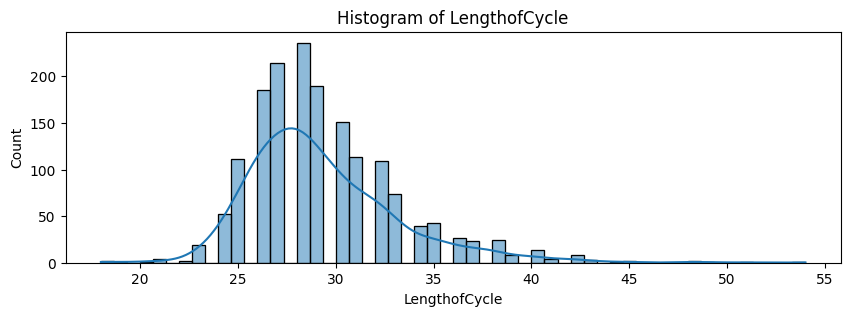

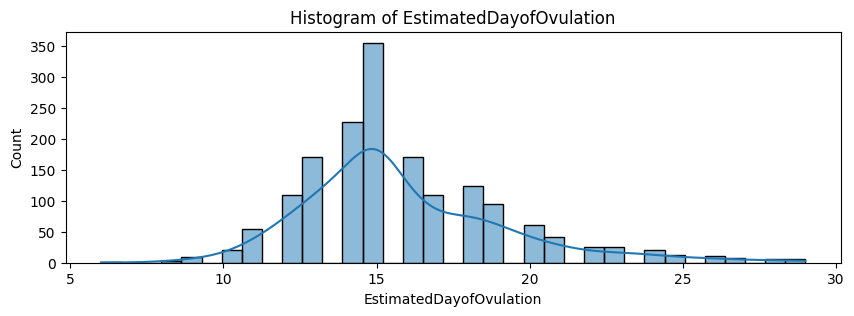

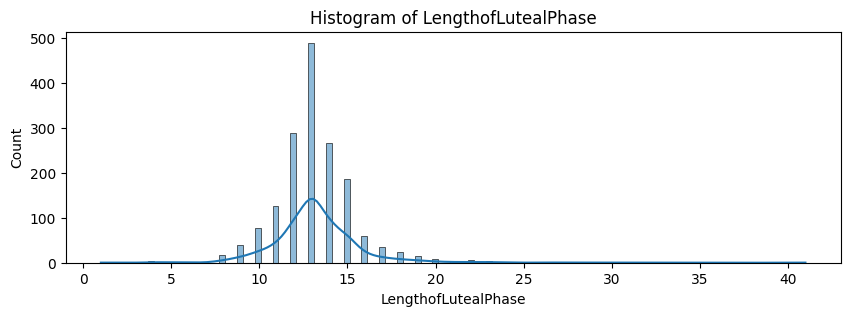

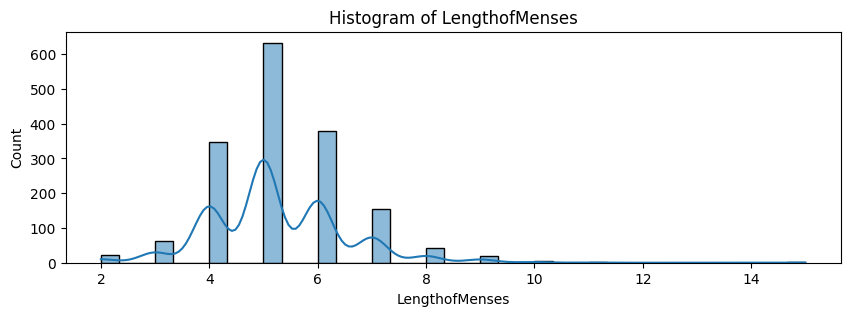

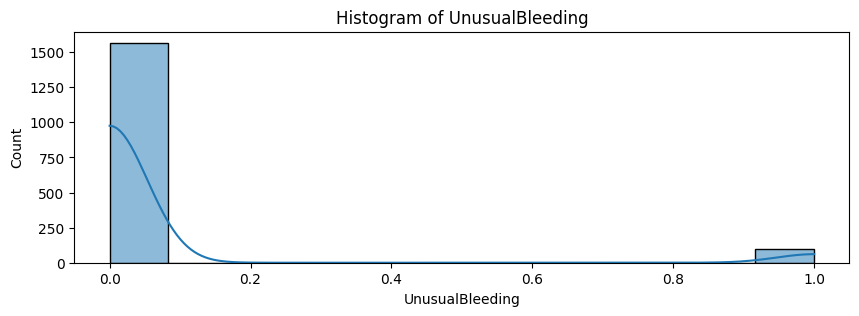

In [ ]:
numerical_columns = ovul_data.select_dtypes(include=['int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 3))
    sns.histplot(ovul_data[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
ovul_data.head()

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,UnusualBleeding,Height(inches),Weight(lbs)
0,29,17,12,5,0,63.0,120.0
1,27,15,12,5,0,63.0,120.0
2,29,15,14,5,0,63.0,120.0
3,27,15,12,5,0,63.0,120.0
4,28,16,12,5,0,63.0,120.0


In [ ]:
ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'UnusualBleeding', 'Height(inches)', 'Weight(lbs)'],
      dtype='object')

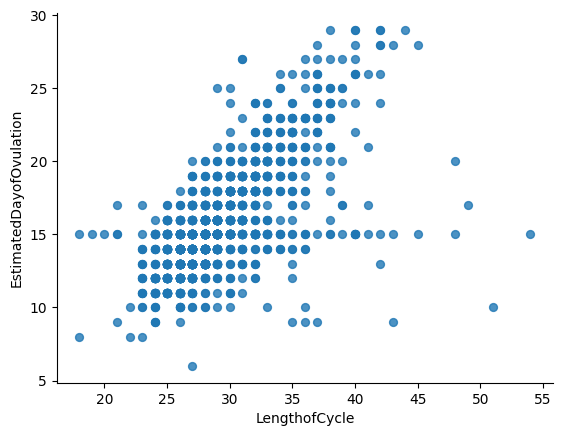

In [ ]:
ovul_data.plot(kind='scatter', x='LengthofCycle', y='EstimatedDayofOvulation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

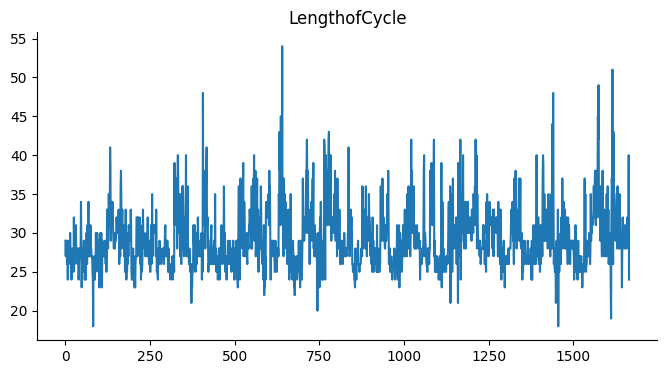

In [ ]:
ovul_data['LengthofCycle'].plot(kind='line', figsize=(8, 4), title='LengthofCycle')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'UnusualBleeding', 'Height(inches)', 'Weight(lbs)'],
      dtype='object')

In [ ]:
col = ['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'UnusualBleeding', 'Height(inches)', 'Weight(lbs)']

In [ ]:
for i in col:
  print(f'Value Counts {i}')
  print(ovul_data[i].value_counts())

Value Counts LengthofCycle
LengthofCycle
28    236
27    214
29    190
26    185
30    151
31    113
25    111
32    109
33     74
24     52
35     43
34     39
36     27
38     24
37     23
23     19
40     14
39      8
42      8
21      4
41      4
43      3
18      2
45      2
22      2
48      2
54      1
20      1
44      1
49      1
19      1
51      1
Name: count, dtype: int64
Value Counts EstimatedDayofOvulation
EstimatedDayofOvulation
15    355
14    227
13    171
16    170
18    123
17    110
12    109
19     94
20     61
11     55
21     42
23     26
22     26
10     20
24     20
25     13
26     11
9       9
27      7
28      6
29      6
8       3
6       1
Name: count, dtype: int64
Value Counts LengthofLutealPhase
LengthofLutealPhase
13    489
12    288
14    267
15    186
11    126
10     77
16     59
9      40
17     35
18     23
8      17
19     16
20      8
22      6
4       4
23      4
21      4
24      2
6       2
5       2
26      2
7       1
29      1
1       1
32 

In [ ]:
ovul_data.head()

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,UnusualBleeding,Height(inches),Weight(lbs)
0,29,17,12,5,0,63.0,120.0
1,27,15,12,5,0,63.0,120.0
2,29,15,14,5,0,63.0,120.0
3,27,15,12,5,0,63.0,120.0
4,28,16,12,5,0,63.0,120.0


In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

unusualbleeding_encoded = one_hot_encoder.fit_transform(ovul_data[['UnusualBleeding']])


unusualbleeding_df = p.DataFrame(unusualbleeding_encoded, columns=['UnusualBleeding_' + str(int(i)) for i in range(unusualbleeding_encoded.shape[1])])

ovul_data = p.concat([ovul_data, unusualbleeding_df], axis=1)


In [ ]:
ovul_data[['UnusualBleeding_0','UnusualBleeding_1']] = ovul_data[['UnusualBleeding_0','UnusualBleeding_1']].astype(int)

In [ ]:
ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LengthofCycle            1665 non-null   int64  
 1   EstimatedDayofOvulation  1665 non-null   int64  
 2   LengthofLutealPhase      1665 non-null   int64  
 3   LengthofMenses           1665 non-null   int64  
 4   UnusualBleeding          1665 non-null   int64  
 5   Height(inches)           1665 non-null   float64
 6   Weight(lbs)              1665 non-null   float64
 7   UnusualBleeding_0        1665 non-null   int64  
 8   UnusualBleeding_1        1665 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 117.2 KB


In [ ]:
ovul_data.head()

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,UnusualBleeding,Height(inches),Weight(lbs),UnusualBleeding_0,UnusualBleeding_1
0,29,17,12,5,0,63.0,120.0,1,0
1,27,15,12,5,0,63.0,120.0,1,0
2,29,15,14,5,0,63.0,120.0,1,0
3,27,15,12,5,0,63.0,120.0,1,0
4,28,16,12,5,0,63.0,120.0,1,0


In [ ]:
ovul_data.drop(['UnusualBleeding'],axis=1,inplace=True)

In [ ]:
uc1 = ovul_data['UnusualBleeding_0'].value_counts()
uc2 = ovul_data['UnusualBleeding_1'].value_counts()
print(uc1)
print(uc2)

UnusualBleeding_0
1    1567
0      98
Name: count, dtype: int64
UnusualBleeding_1
0    1567
1      98
Name: count, dtype: int64


In [ ]:
ovul_data.columns

In [ ]:
ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'Height(inches)', 'Weight(lbs)', 'UnusualBleeding_0',
       'UnusualBleeding_1'],
      dtype='object')

In [ ]:
def visualize_value_counts(data, column):
    value_counts = data[column].value_counts()
    plt.figure(figsize=(10, 3))
    sns.countplot(data = data,
              x = column)
    plt.title(f'Value Counts {column}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
num_cols = ovul_data.select_dtypes(include=["int", "float"]).columns.tolist()

In [ ]:
rs = ovul_data.shape[0]
print(rs)
cs = ovul_data.shape[1]
print(cs)

1665
8


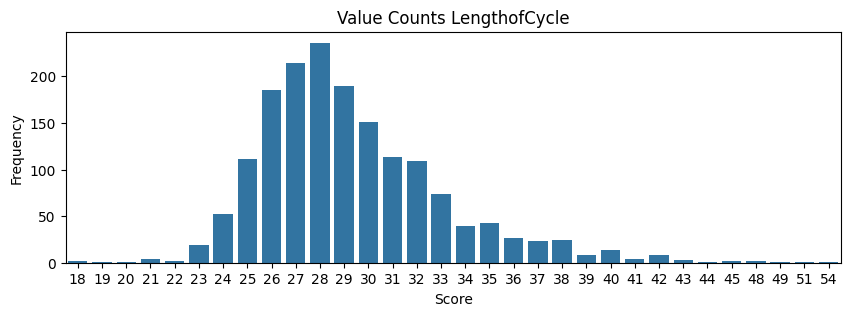

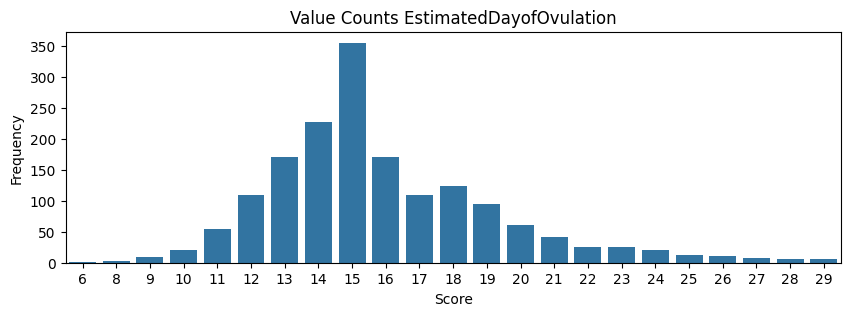

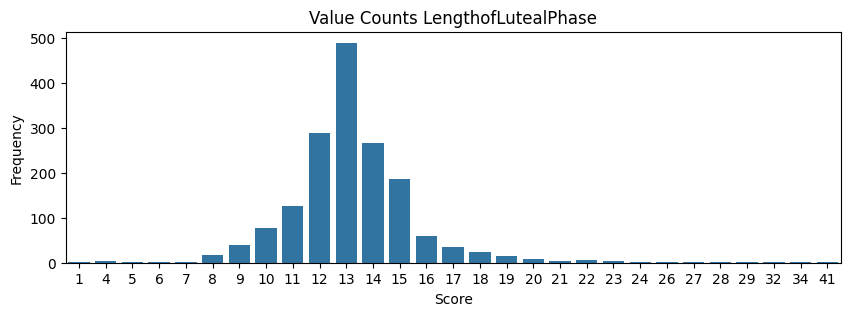

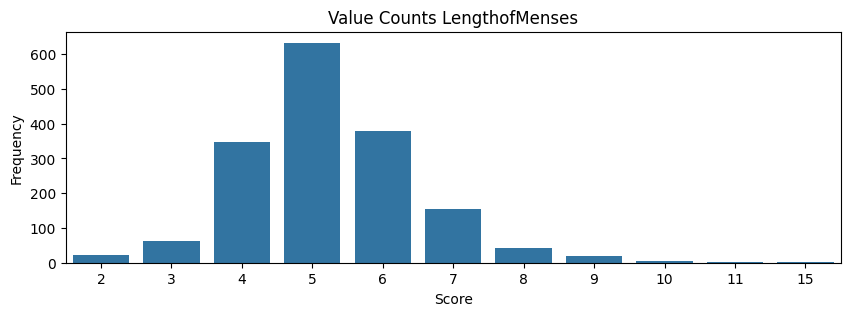

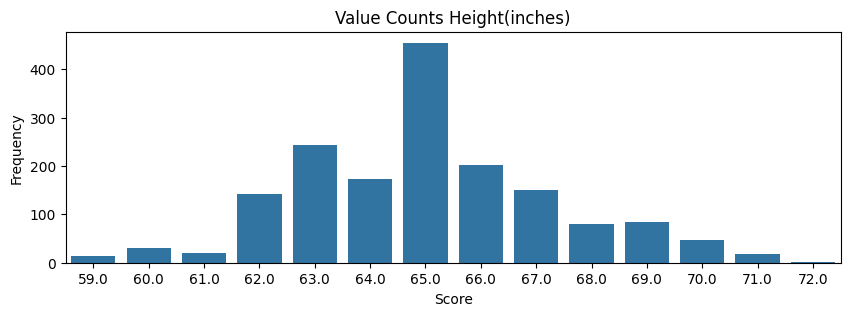

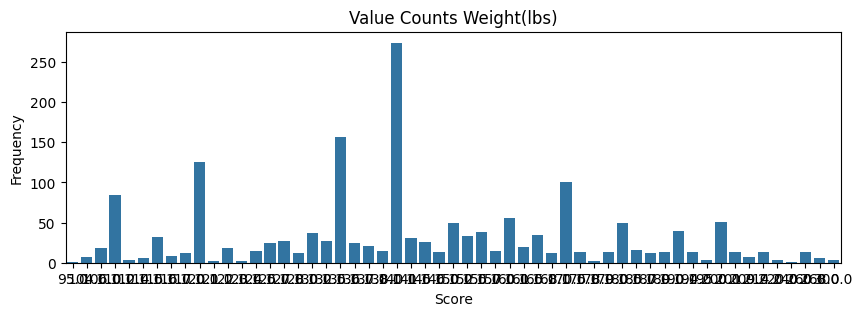

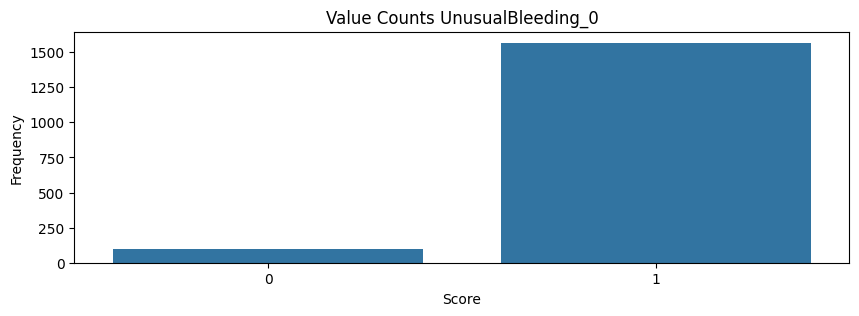

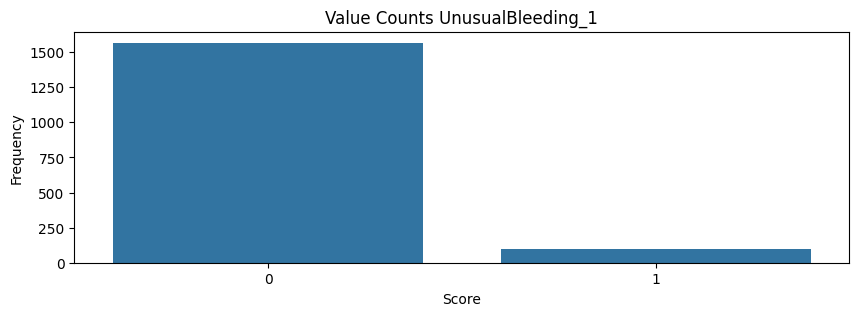

In [ ]:
for i in num_cols:
    visualize_value_counts(ovul_data, i)

In [ ]:
def find_skewness(df,col):
  for i in num_cols:
        skewness = df[i].skew()
        print(f"Skewness of '{i}': {skewness}")

In [ ]:
find_skewness(ovul_data,col)

Skewness of 'LengthofCycle': 1.289486172768664
Skewness of 'EstimatedDayofOvulation': 1.0361881355893514
Skewness of 'LengthofLutealPhase': 2.1001789849051495
Skewness of 'LengthofMenses': 0.7389901907186534
Skewness of 'Height(inches)': 0.24952003760902267
Skewness of 'Weight(lbs)': 1.3143096732386286
Skewness of 'UnusualBleeding_0': -3.7520255783023426
Skewness of 'UnusualBleeding_1': 3.7520255783023426


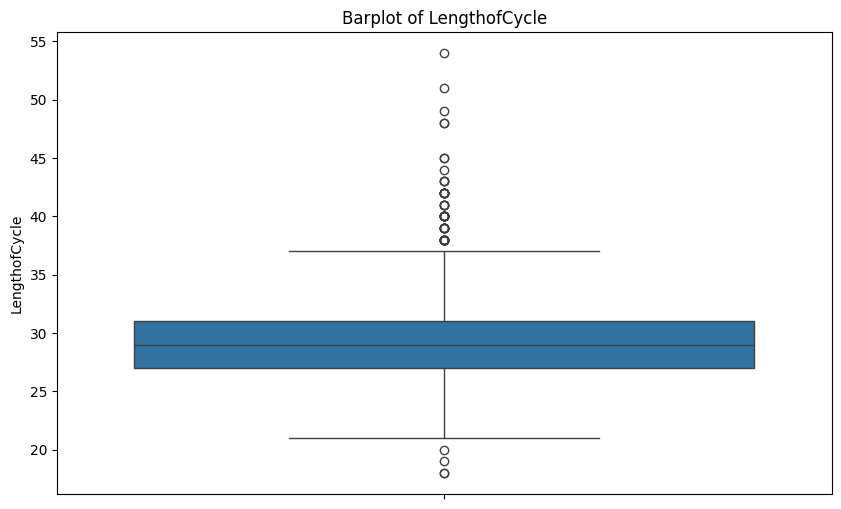

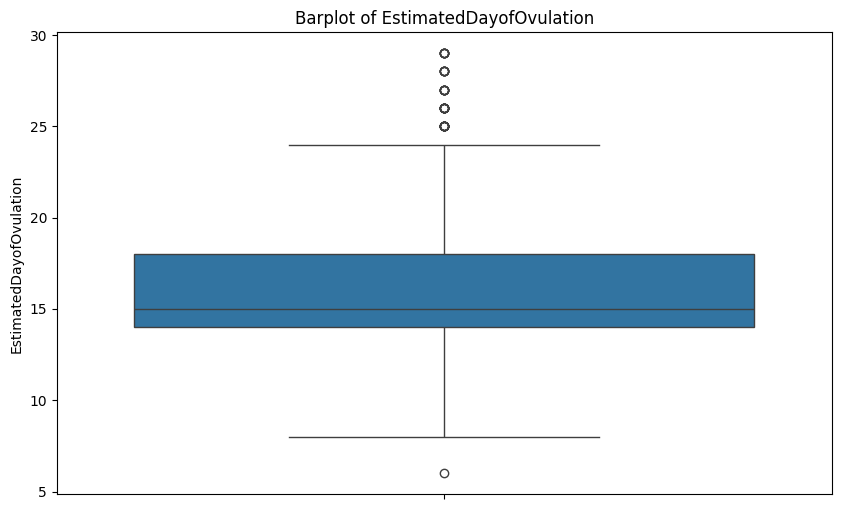

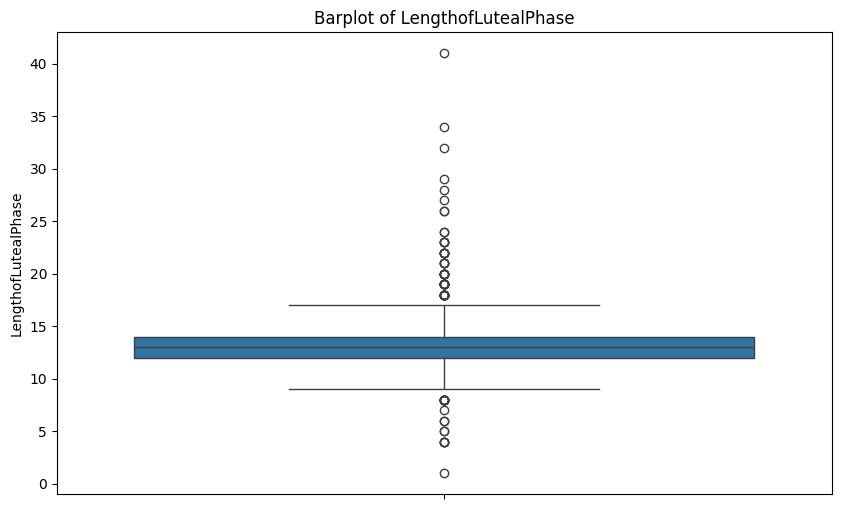

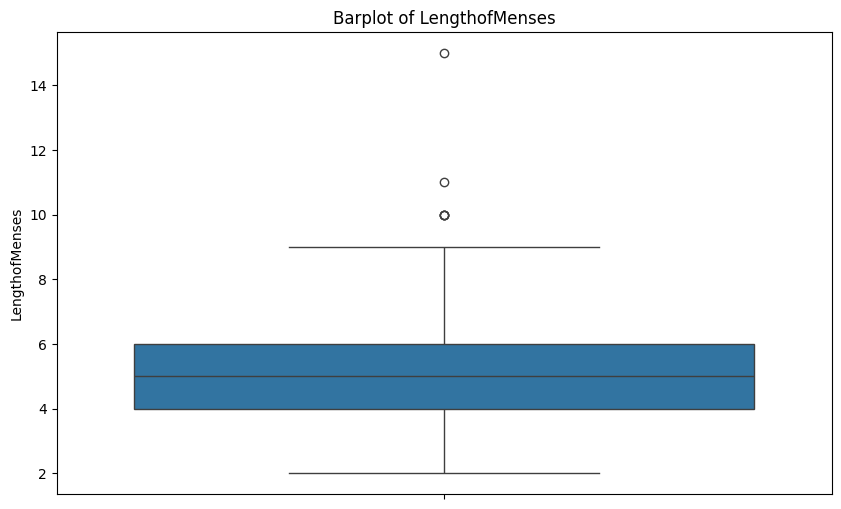

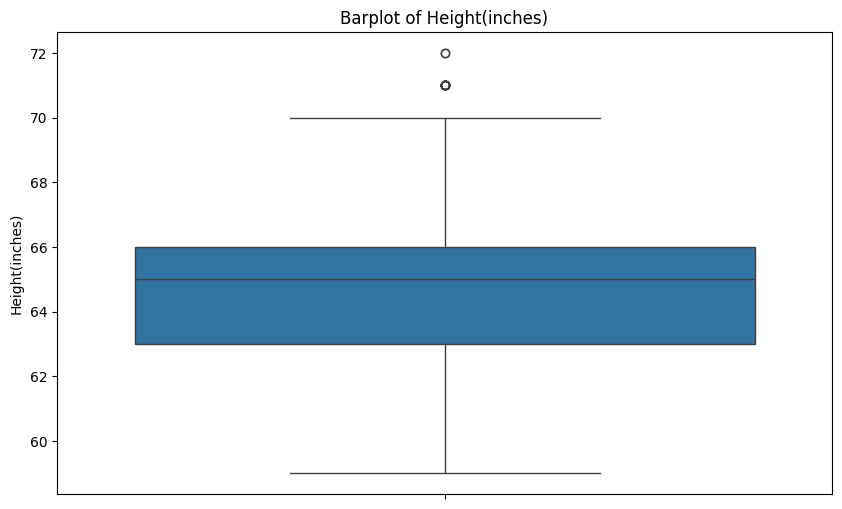

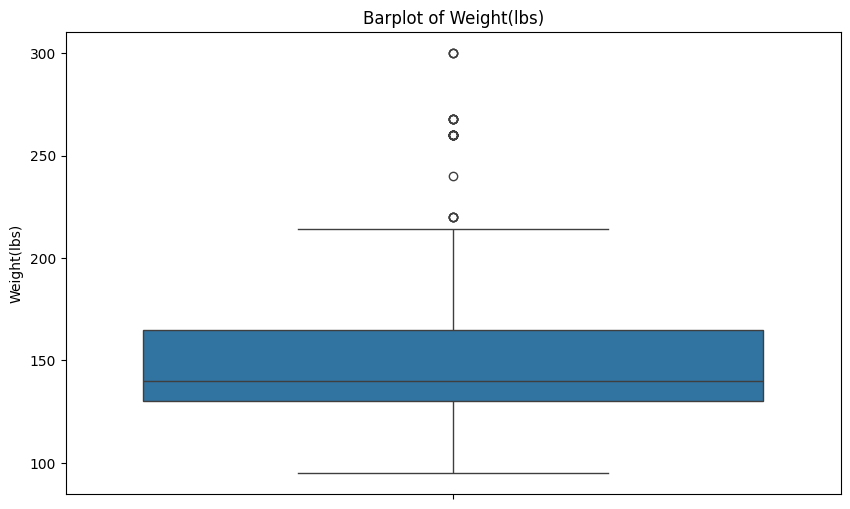

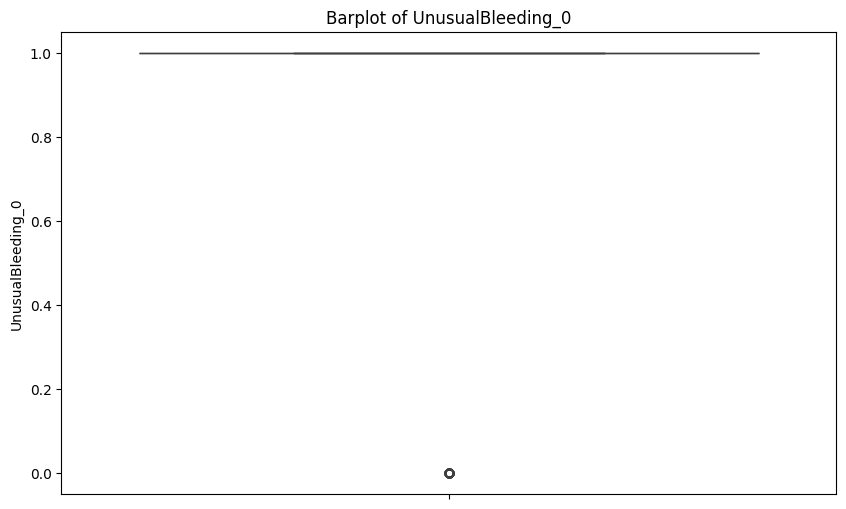

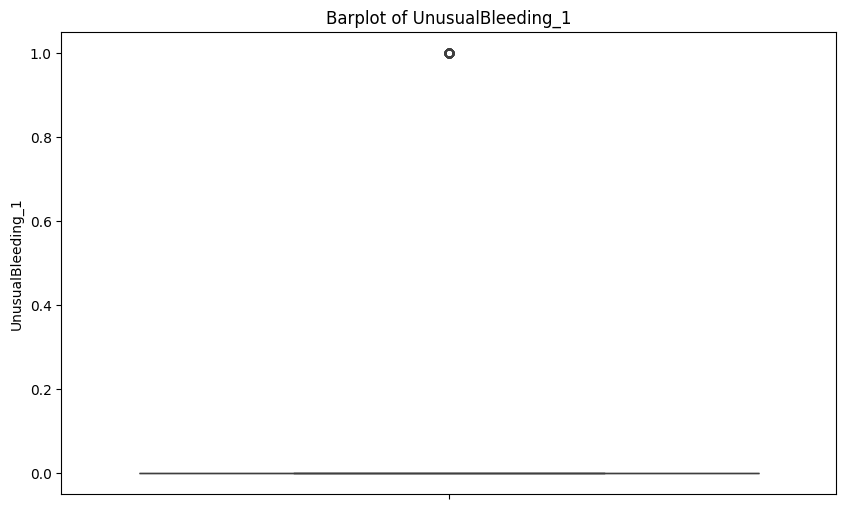

In [ ]:
for column in ovul_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(ovul_data[column])
    plt.title(f'Barplot of {column}')
    plt.show()

In [ ]:
ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'Height(inches)', 'Weight(lbs)', 'UnusualBleeding_0',
       'UnusualBleeding_1'],
      dtype='object')

In [ ]:
new_ovul_data = ovul_data.copy()

features1 = ovul_data.columns.tolist()

for i in features1:
    Q1 = new_ovul_data[i].quantile(0.25)
    Q3 = new_ovul_data[i].quantile(0.75)
    IQR = Q3 - Q1
    new_ovul_data = new_ovul_data[new_ovul_data[i] <= (Q3+(1.5*IQR))]
    new_ovul_data = new_ovul_data[new_ovul_data[i] >= (Q1-(1.5*IQR))]
    new_ovul_data = new_ovul_data.reset_index(drop=True)
display(new_ovul_data.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(ovul_data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(new_ovul_data.shape[0]))


,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,Height(inches),Weight(lbs),UnusualBleeding_0,UnusualBleeding_1
0,29,17,12,5,63.0,120.0,1,0
1,27,15,12,5,63.0,120.0,1,0
2,29,15,14,5,63.0,120.0,1,0
3,27,15,12,5,63.0,120.0,1,0
4,28,16,12,5,63.0,120.0,1,0



Inference:
Before removal of outliers, The dataset had 1665 samples.
After removal of outliers, The dataset now has 1320 samples.


In [ ]:
new_ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LengthofCycle            1320 non-null   int64  
 1   EstimatedDayofOvulation  1320 non-null   int64  
 2   LengthofLutealPhase      1320 non-null   int64  
 3   LengthofMenses           1320 non-null   int64  
 4   Height(inches)           1320 non-null   float64
 5   Weight(lbs)              1320 non-null   float64
 6   UnusualBleeding_0        1320 non-null   int64  
 7   UnusualBleeding_1        1320 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 82.6 KB


In [ ]:
new_ovul_data.isna().sum()

LengthofCycle              0
EstimatedDayofOvulation    0
LengthofLutealPhase        0
LengthofMenses             0
Height(inches)             0
Weight(lbs)                0
UnusualBleeding_0          0
UnusualBleeding_1          0
dtype: int64

In [ ]:
new_ovul_data.columns

Index(['LengthofCycle', 'EstimatedDayofOvulation', 'LengthofLutealPhase',
       'LengthofMenses', 'Height(inches)', 'Weight(lbs)', 'UnusualBleeding_0',
       'UnusualBleeding_1'],
      dtype='object')

In [ ]:
new_ovul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LengthofCycle            1320 non-null   int64  
 1   EstimatedDayofOvulation  1320 non-null   int64  
 2   LengthofLutealPhase      1320 non-null   int64  
 3   LengthofMenses           1320 non-null   int64  
 4   Height(inches)           1320 non-null   float64
 5   Weight(lbs)              1320 non-null   float64
 6   UnusualBleeding_0        1320 non-null   int64  
 7   UnusualBleeding_1        1320 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 82.6 KB


In [ ]:
new_ovul_data.head()

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,Height(inches),Weight(lbs),UnusualBleeding_0,UnusualBleeding_1
0,29,17,12,5,63.0,120.0,1,0
1,27,15,12,5,63.0,120.0,1,0
2,29,15,14,5,63.0,120.0,1,0
3,27,15,12,5,63.0,120.0,1,0
4,28,16,12,5,63.0,120.0,1,0


<Axes: >

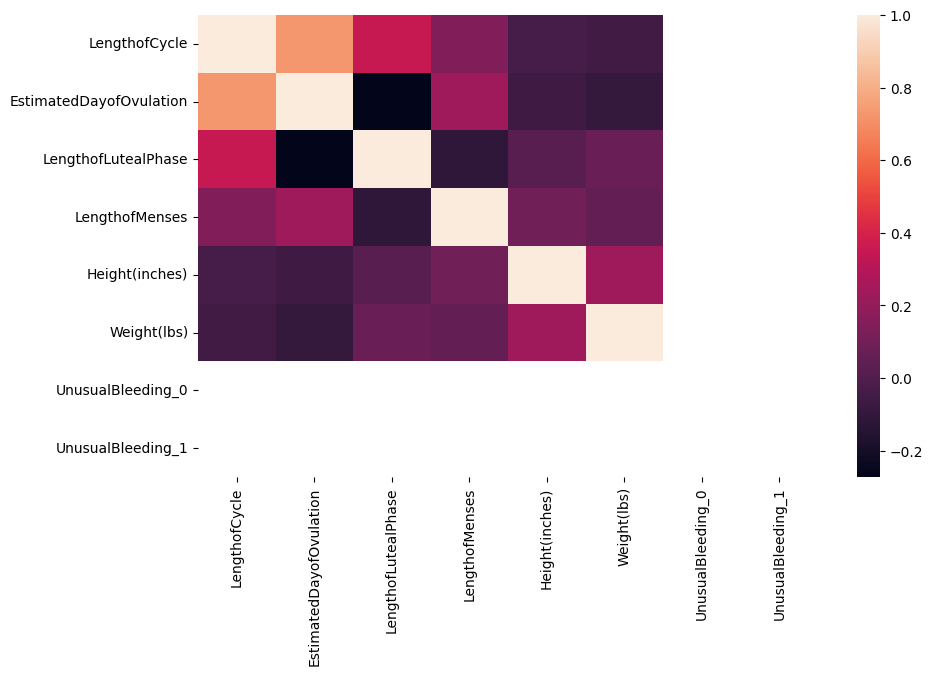

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=new_ovul_data.corr())

In [ ]:
new_ovul_data.tail()

,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,Height(inches),Weight(lbs),UnusualBleeding_0,UnusualBleeding_1
1315,30,19,11,7,65.034892,149.434752,1,0
1316,32,19,13,7,65.034892,149.434752,1,0
1317,28,17,11,6,65.034892,149.434752,1,0
1318,28,16,12,5,65.034892,149.434752,1,0
1319,24,15,13,5,65.034892,149.434752,1,0


In [ ]:
X = new_ovul_data.drop(['EstimatedDayofOvulation'],axis = 1)

In [ ]:
y = new_ovul_data['EstimatedDayofOvulation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X.columns

Index(['LengthofCycle', 'LengthofLutealPhase', 'LengthofMenses',
       'Height(inches)', 'Weight(lbs)', 'UnusualBleeding_0',
       'UnusualBleeding_1'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
X_train_scaled.shape

(924, 7)

In [ ]:
lm = LinearRegression()


In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test_scaled)

In [ ]:
def cal_error(y_test, y_pred):
    print ("Mean Absolute Error : ", round(np.mean(abs(y_test - y_pred)), 2))
    print ("Mean Squared Error : ", round(np.mean((y_test - y_pred)**2), 2))
    print ("Mean Absolute Error : ", round(np.sqrt(np.mean((y_test - y_pred)**2)), 2))

In [ ]:
def cal_accuracy(y_test, y_pred):
    errors = abs(y_pred - y_test)
    mape = 100 * (errors / (y_test + (y_test==0)))
    accuracy = abs(100 - np.mean(mape))
    print("Accuracy : ", round(accuracy, 2), '%')

In [ ]:
cal_error(y_test, y_pred)
cal_accuracy(y_test, y_pred)

Mean Absolute Error :  0.45
Mean Squared Error :  0.68
Mean Absolute Error :  0.83
Accuracy :  97.04 %


In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
criterion = ['squared_error', 'absolute_error']

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['squared_error', 'absolute_error']}


In [ ]:
rf = RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=80,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
y_pred_rf = rf_randomcv.predict(X_test)

In [ ]:
cal_error(y_test, y_pred_rf)
cal_accuracy(y_test, y_pred_rf)

Mean Absolute Error :  0.36
Mean Squared Error :  0.48
Mean Absolute Error :  0.69
Accuracy :  97.63 %


In [ ]:
import joblib
model_filename = 'model_cyclus_21apr.pkl'

joblib.dump(lm, model_filename)

['model_cyclus_21apr.pkl']